In [1]:
import pandas as pd
import numpy as np
import polars as pl

In [2]:
weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')
weather_df

,Unnamed: 0,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,22142,72518,Albany,1999-01-15,Winter,-8.9,-17.2,-0.6,18.0,254.0,NaN,9.0,NaN,1014.9,NaN
1,22173,72518,Albany,1999-02-15,Winter,-6.7,-14.4,1.1,0.0,76.0,NaN,3.6,NaN,1026.1,NaN
2,22385,72518,Albany,1999-09-15,Autumn,19.4,15.6,22.8,2.3,0.0,NaN,6.8,NaN,1019.0,NaN
3,22415,72518,Albany,1999-10-15,Autumn,6.1,-1.7,13.9,0.0,0.0,NaN,9.7,NaN,1025.4,NaN
4,22446,72518,Albany,1999-11-15,Autumn,2.2,-0.6,5.0,0.0,0.0,302.0,27.7,NaN,1003.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,31455,72405,Washington,2022-10-15,Autumn,15.9,9.4,24.4,0.0,0.0,193.0,10.8,NaN,1015.6,NaN
3061,31486,72405,Washington,2022-11-15,Autumn,4.9,2.2,6.7,31.0,0.0,22.0,14.4,NaN,1026.1,NaN
3062,31516,72405,Washington,2022-12-15,Winter,3.6,1.1,8.9,47.8,0.0,38.0,15.5,NaN,1015.1,NaN
3063,31547,72405,Washington,2023-01-15,Winter,1.9,-1.6,8.3,0.0,0.0,336.0,22.7,NaN,1019.1,NaN


In [3]:
games_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")
records_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/standings.csv", index_col="team")[["season","pct"]].groupby(["team"])["pct"].mean()

weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')#.groupby("month_number")

games_df["home_team_win_perecentage"] = games_df["home_team"].map(records_df)
games_df["away_team_win_perecentage"] = games_df["away_team"].map(records_df)

games_df = games_df.loc[games_df['gameday']<='2024-03-01']

games_df["month_number"] = pd.to_numeric(games_df['gameday'].str[5:7])

phoenixList = ['ARI', 'LV', 'SD']
d1=dict.fromkeys(phoenixList, 'Phoenix')
columbusList = ['CIN', 'CLE', 'PIT']
d2=dict.fromkeys(columbusList, 'Columbus')
sacramentoList = ['LAR', 'LAC', 'LA', 'SF', 'OAK']
d3=dict.fromkeys(sacramentoList, 'Sacramento')
tallahasseeList = ['JAX', 'TB', 'MIA']
d4=dict.fromkeys(tallahasseeList, 'Tallahassee')
madisonList = ['GB','CHI']
d5=dict.fromkeys(madisonList, 'Madison')
topekaList = ['KC','STL']
d6=dict.fromkeys(topekaList, 'Topeka')
austinList = ['DAL','HOU']
d7=dict.fromkeys(austinList, 'Austin')
trentonList = ['PHI', 'NYJ', 'NYG']
d8=dict.fromkeys(trentonList, 'Trenton')

d = {**d1,**d2,**d3,**d4,**d5,**d6,**d7, **d8, \
     "CAR": "Columbia", "TEN": "Nashville", "BAL": "Annapolis", \
        "WAS": "Washington", "SEA": "Olympia", "DEN": "Denver", \
            "NE": "Providence", "IND": "Indianapolis", "MIN": "Saint Paul", \
                "DET": "Lansing", "BUF": "Albany", "ATL": "Atlanta", "NO": "Jackson"}
games_df['homeTeamNearestWeatherStation'] = games_df['home_team'].map(d)
games_df['awayTeamNearestWeatherStation'] = games_df['away_team'].map(d)

In [4]:
weather_df['date']= pd.to_datetime(weather_df['date'])
january_weather_df = weather_df[weather_df['date'].dt.month == 1].groupby('city_name')['avg_temp_c'].mean()
february_weather_df = weather_df[weather_df['date'].dt.month == 2].groupby('city_name')['avg_temp_c'].mean()
september_weather_df = weather_df[weather_df['date'].dt.month == 9].groupby('city_name')['avg_temp_c'].mean()
october_weather_df = weather_df[weather_df['date'].dt.month == 10].groupby('city_name')['avg_temp_c'].mean()
november_weather_df = weather_df[weather_df['date'].dt.month == 11].groupby('city_name')['avg_temp_c'].mean()
december_weather_df = weather_df[weather_df['date'].dt.month == 12].groupby('city_name')['avg_temp_c'].mean()

games_df['avgHomeTeamJanTemp'] = games_df['homeTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamFebTemp'] = games_df['homeTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamSepTemp'] = games_df['homeTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamOctTemp'] = games_df['homeTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamNovTemp'] = games_df['homeTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamDecTemp'] = games_df['homeTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df['avgAwayTeamJanTemp'] = games_df['awayTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamFebTemp'] = games_df['awayTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamSepTemp'] = games_df['awayTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamOctTemp'] = games_df['awayTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamNovTemp'] = games_df['awayTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamDecTemp'] = games_df['awayTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df.loc[games_df['month_number']== 1, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamDecTemp']

games_df.loc[games_df['month_number']== 1, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamDecTemp']

games_df[['home_team','away_team','month_number', 'homeAcclimatisedTemp', 'awayAcclimatisedTemp']]

,home_team,away_team,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp
0,ATL,MIN,9,73.707500,63.875000
1,CHI,KC,9,61.655000,67.895000
2,CLE,PIT,9,65.307826,65.307826
3,GB,OAK,9,61.655000,69.197391
4,IND,BUF,9,66.192500,63.560000
...,...,...,...,...,...
6701,DET,TB,1,23.502500,50.806400
6702,BUF,KC,1,21.214400,31.020800
6703,BAL,KC,1,33.915200,31.020800
6704,SF,DET,1,46.047200,23.502500


In [5]:

games_df['home_acclimatisation_advantage'] = (games_df['homeAcclimatisedTemp'] - games_df['temp'])-(games_df['awayAcclimatisedTemp']-games_df['temp'])

games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 50) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -50), 'home_acclimatisation_category'] = 5
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 40) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -40), 'home_acclimatisation_category'] = 4
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 30) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -30), 'home_acclimatisation_category'] = 3
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 20) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -20), 'home_acclimatisation_category'] = 2
games_df.loc[((games_df['homeAcclimatisedTemp'] - games_df['temp']) < 10) & ((games_df['homeAcclimatisedTemp'] - games_df['temp']) > -10), 'home_acclimatisation_category'] = 1

games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 60) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -60), 'away_acclimatisation_category'] = 6
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 50) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -50), 'away_acclimatisation_category'] = 5
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 40) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -40), 'away_acclimatisation_category'] = 4
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 30) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -30), 'away_acclimatisation_category'] = 3
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 20) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -20), 'away_acclimatisation_category'] = 2
games_df.loc[((games_df['awayAcclimatisedTemp'] - games_df['temp']) < 10) & ((games_df['awayAcclimatisedTemp'] - games_df['temp']) > -10), 'away_acclimatisation_category'] = 1

games_df['acclimatisation_category_difference'] = games_df['away_acclimatisation_category'] - games_df['home_acclimatisation_category']

df = games_df

In [6]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(df.iloc[:, 26:40], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,wind,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.0,0.503437,0.519981,9,73.707500,63.875000,0.000000,0.0,0.0,0.0
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,12.0,0.462116,0.570173,9,61.655000,67.895000,-6.240000,2.0,2.0,0.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,12.0,0.361333,0.627238,9,65.307826,65.307826,0.000000,2.0,2.0,0.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,10.0,0.614770,0.357639,9,61.655000,69.197391,-7.542391,1.0,1.0,0.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.0,0.601023,0.491049,9,66.192500,63.560000,0.000000,0.0,0.0,0.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,8.0,0.387948,0.482177,9,79.760000,69.197391,10.562609,1.0,1.0,0.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.0,0.569373,0.477382,9,70.212500,75.972500,0.000000,0.0,0.0,0.0
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,5.0,0.423753,0.697570,9,70.347500,66.837500,3.510000,1.0,1.0,0.0
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,3.0,0.578804,0.439898,9,70.347500,90.207500,-19.860000,1.0,2.0,1.0
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.0,0.573450,0.379236,9,59.240000,60.185000,0.000000,0.0,0.0,0.0


In [7]:
roofMap = {"dome":1, "outdoors":0, "closed":1, "open":0}
df['roof']= df['roof'].map(roofMap)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

In [8]:
df.to_csv('dataframe.csv')

In [9]:
df1 = df.iloc[6460]
df1

away_team                                    LAC
away_score                                  28.0
home_team                                    MIN
home_score                                  24.0
location                                    Home
home_winning_margin                         -4.0
total                                       52.0
overtime                                     0.0
away_rest                                      7
home_rest                                     10
away_moneyline                            -110.0
home_moneyline                            -110.0
spread_line                                  1.0
away_spread_odds                          -115.0
home_spread_odds                          -105.0
total_line                                  54.0
under_odds                                -110.0
over_odds                                 -110.0
div_game                                       0
indoor_game                                    1
temp                

In [10]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,20.873993,23.234566,2.360573,44.108559,0.061288,7.472413,7.522070,59.315240,-92.468983,2.313451,...,53.143450,-0.193075,1.063823,1.342827,0.279004,0.565016,0.483895,0.649866,0.474650,0.047122
std,10.065753,10.316932,14.616551,14.208215,0.239876,1.976951,2.098159,244.880739,281.343748,5.962331,...,14.482275,9.967743,0.882904,1.195245,0.795680,0.495792,0.499778,13.463998,0.499394,13.263428
min,0.000000,0.000000,-49.000000,3.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,17.225600,-36.007200,0.000000,0.000000,-3.000000,0.000000,0.000000,-39.500000,0.000000,-52.000000
25%,14.000000,16.000000,-7.000000,34.000000,0.000000,7.000000,7.000000,-104.000000,-210.000000,-3.000000,...,42.582500,-4.383499,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,-8.500000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,53.652500,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
75%,27.000000,30.000000,11.000000,53.000000,0.000000,7.000000,7.000000,187.750000,0.000000,6.500000,...,64.737500,4.042500,2.000000,2.000000,1.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,90.207500,35.184000,5.000000,6.000000,3.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [11]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6706,6706,6706
unique,35,35,2
top,BAL,NE,Home
freq,222,231,6627


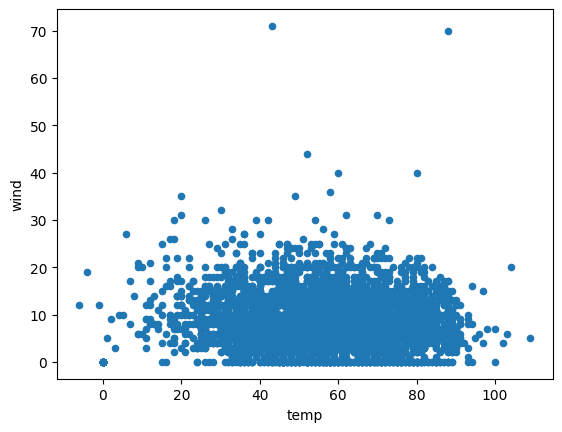

In [12]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [13]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,63.8750,0.0,0.0,0.0,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,63.5600,0.0,0.0,0.0,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,75.9725,0.0,0.0,0.0,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,60.1850,0.0,0.0,0.0,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,69.2600,0.0,0.0,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,CLE,14.0,HOU,45.0,Home,31.0,59.0,0.0,6,7,...,28.5440,0.0,0.0,0.0,0.0,1,1,14.0,1,33.5
6695,GB,48.0,DAL,32.0,Home,-16.0,80.0,0.0,7,7,...,21.0200,0.0,0.0,0.0,0.0,0,1,27.5,0,-23.0
6696,LA,23.0,DET,24.0,Home,1.0,47.0,0.0,7,7,...,46.0472,0.0,0.0,0.0,0.0,1,0,-5.5,0,-2.5
6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,7,...,50.8064,0.0,0.0,0.0,0.0,1,1,4.5,1,2.0


In [14]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,67.895000,-6.240000,2.0,2.0,0.0,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,65.307826,0.000000,2.0,2.0,0.0,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,69.197391,-7.542391,1.0,1.0,0.0,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,69.197391,10.562609,1.0,1.0,0.0,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,66.837500,3.510000,1.0,1.0,0.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,HOU,10.0,BAL,34.0,Home,24.0,44.0,0.0,7,14,...,51.648800,-17.733600,1.0,3.0,2.0,1,0,0.0,1,14.0
6700,GB,21.0,SF,24.0,Home,3.0,45.0,0.0,6,13,...,21.020000,25.027200,2.0,4.0,2.0,1,0,-5.5,0,-7.5
6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,6,...,31.020800,-9.806400,1.0,1.0,0.0,0,1,5.5,0,-5.5
6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,8,...,31.020800,2.894400,2.0,2.0,0.0,0,0,-17.0,0,-11.5


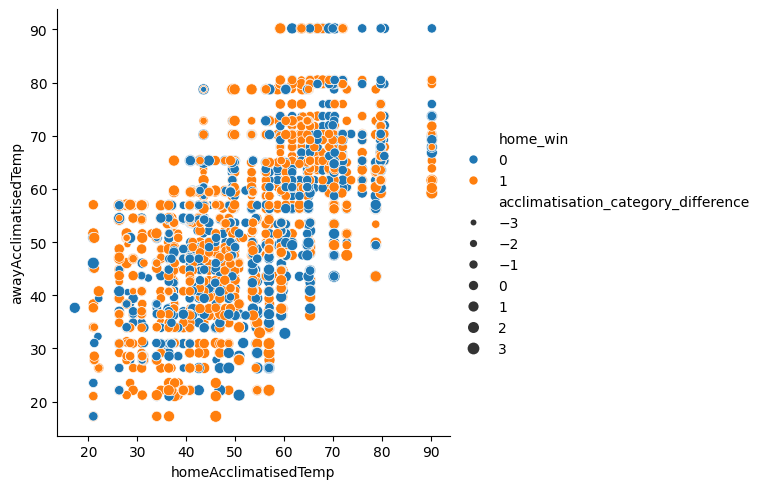

In [15]:
import seaborn as sns

sns.relplot(
    data=outdoor_df,
    x="homeAcclimatisedTemp", y="awayAcclimatisedTemp", hue="home_win", size="acclimatisation_category_difference",
)

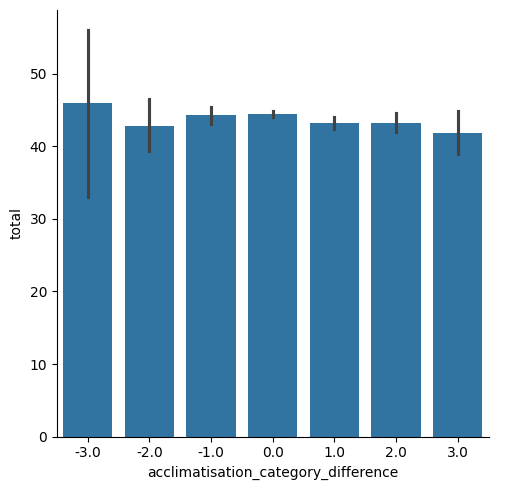

In [16]:
sns.catplot(data=df, kind="bar", x="acclimatisation_category_difference", y="total")#, hue="home_win")

<Axes: xlabel='acclimatisation_category_difference', ylabel='percent'>

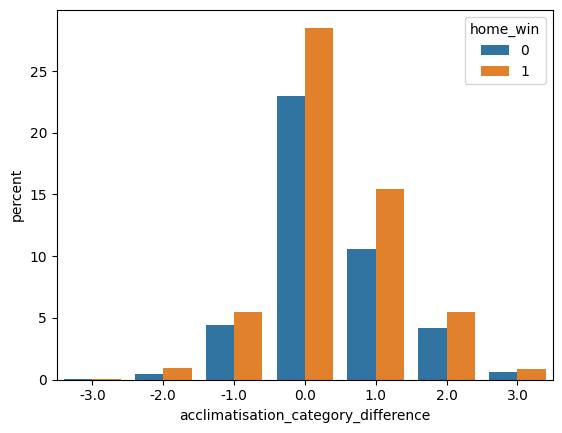

In [17]:
sns.countplot(data=outdoor_df, x="acclimatisation_category_difference", hue="home_win", stat="percent")

<Axes: xlabel='home_acclimatisation_category', ylabel='Percent'>

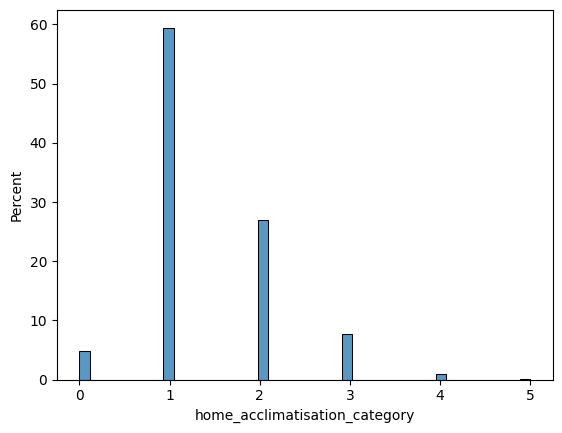

In [18]:
sns.histplot(data=outdoor_df, x="home_acclimatisation_category", stat="percent")

<Axes: xlabel='away_acclimatisation_category', ylabel='Percent'>

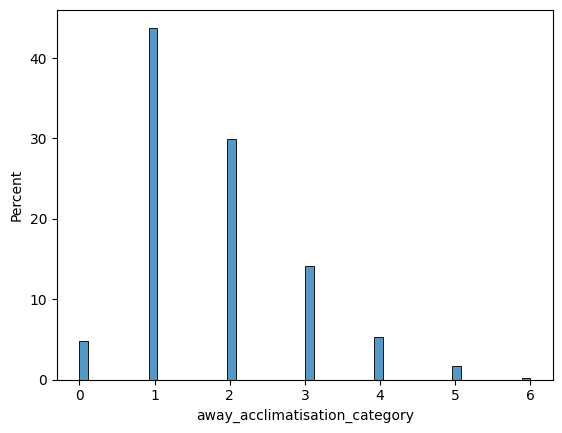

In [19]:
sns.histplot(data=outdoor_df, x="away_acclimatisation_category", stat="percent")

<Axes: xlabel='div_game', ylabel='count'>

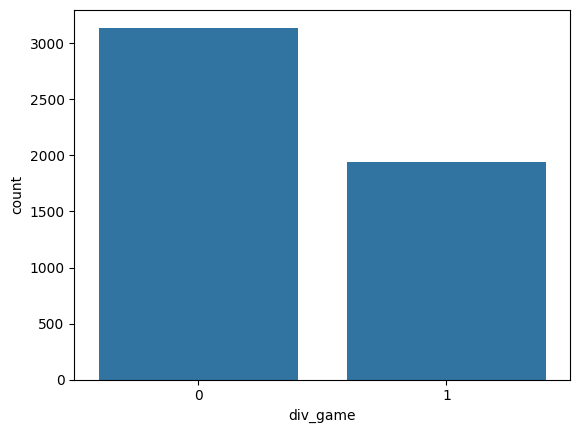

In [20]:
sns.countplot(data=outdoor_df, x="div_game")#, hue="home_win")

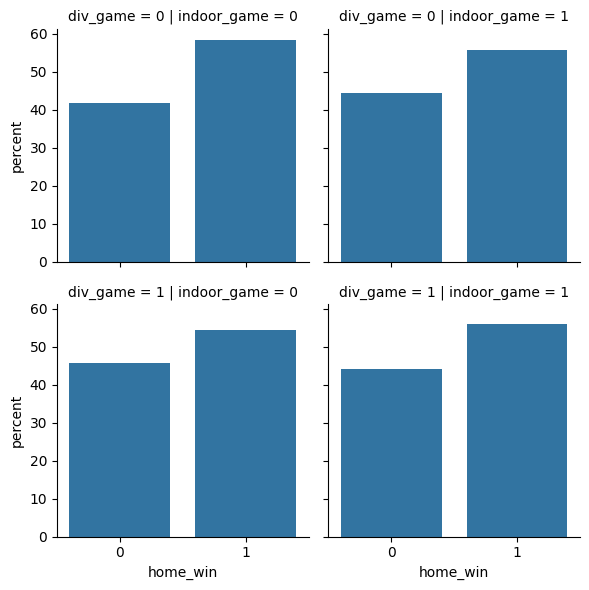

In [21]:
graph= sns.FacetGrid(data=df, col="indoor_game", row="div_game")

graph.map_dataframe(sns.countplot, x="home_win", stat="percent")

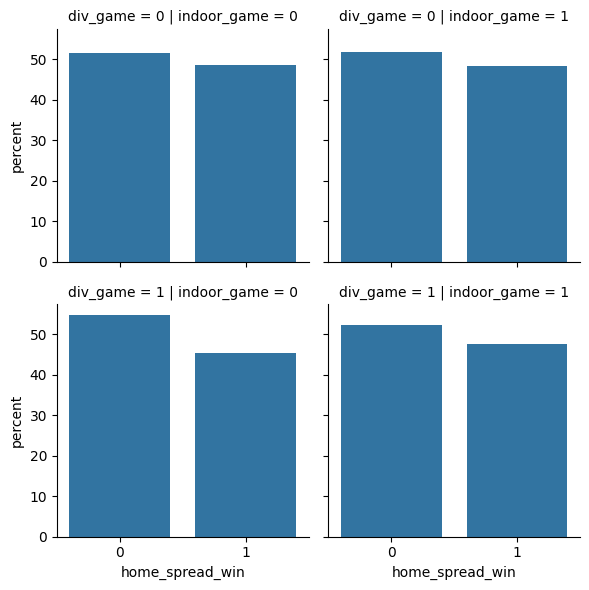

In [22]:
graph= sns.FacetGrid(data=df, col="indoor_game", row="div_game")

graph.map_dataframe(sns.countplot, x="home_spread_win", stat="percent")

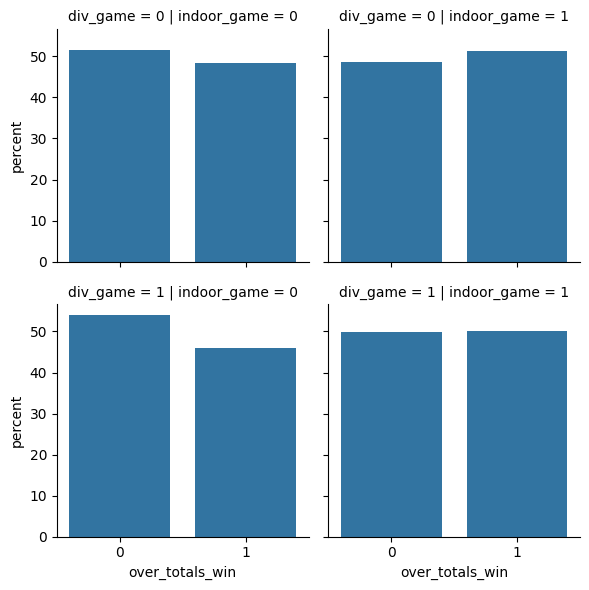

In [23]:
graph= sns.FacetGrid(data=df, col="indoor_game", row="div_game")

graph.map_dataframe(sns.countplot, x="over_totals_win", stat="percent")

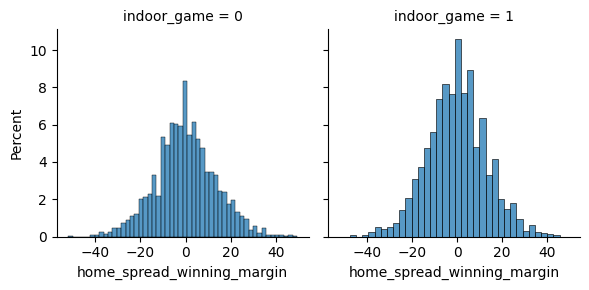

In [24]:
graph= sns.FacetGrid(data=df, col="indoor_game")

graph.map_dataframe(sns.histplot, x="home_spread_winning_margin", stat="percent")

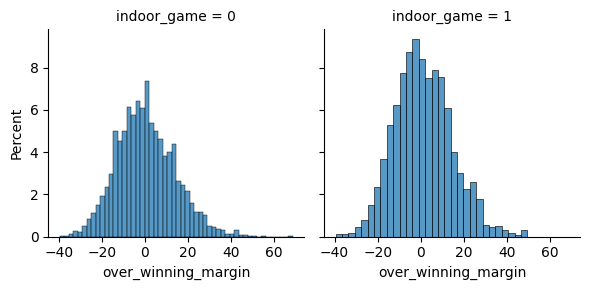

In [25]:
graph= sns.FacetGrid(data=df, col="indoor_game")

graph.map_dataframe(sns.histplot, x="over_winning_margin", stat="percent")

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [27]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\2919916086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\2919916086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\2919916086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [28]:
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [29]:
# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\2317046437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \


In [30]:
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_12236\3069123947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']] = \


In [31]:
from sklearn.model_selection import train_test_split

indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.2)

In [32]:
from sklearn.model_selection import train_test_split

outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_train, outdoor_with_acclimatisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)
outdoor_without_acclimatisation_X_train, outdoor_without_acclimatisation_X_test, outdoor_without_acclimatisation_y_train, outdoor_without_acclimatisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)

In [33]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
1643,33,7,0,-1.136875,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,-0.147076,...,0.077639,72.820870,63.1475,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.171607
3522,28,15,0,0.334393,-0.264164,-0.214139,-0.224350,0.416106,-0.311831,0.189186,...,0.077639,63.747500,78.7400,0.0,0.0,0.0,0.0,0.889731,1.039551,0.278373
1060,34,1,0,-0.296151,-0.264164,1.290078,-0.224350,-0.239180,0.341772,0.105121,...,-0.268965,73.707500,71.9900,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.370302
3895,21,7,0,-0.366211,-0.264164,-0.214139,-0.224350,-1.483395,1.327780,-1.576192,...,0.770849,54.230000,36.9875,0.0,0.0,0.0,0.0,-1.123936,1.039551,0.316530
5089,3,13,0,-1.627298,-0.264164,-0.214139,-0.224350,3.091168,-4.140081,2.374893,...,-0.268965,63.875000,63.5600,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-2.850530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5462,20,4,0,-0.436271,-0.264164,-0.214139,-0.694763,0.424401,-0.326771,0.189186,...,0.424244,59.712174,36.2075,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.561089
1121,4,8,0,-0.366211,3.785524,-0.214139,-0.694763,-0.239180,0.341772,0.273252,...,0.077639,56.307500,64.7600,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.522932
3249,0,13,0,1.525419,-0.264164,-0.214139,-0.224350,0.470022,-0.367854,0.189186,...,0.077639,47.525000,78.7400,0.0,0.0,0.0,0.0,0.889731,1.039551,1.575722
926,11,13,0,0.544574,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,-1.492126,...,0.424244,36.207500,37.4975,0.0,0.0,0.0,0.0,0.889731,1.039551,1.270464


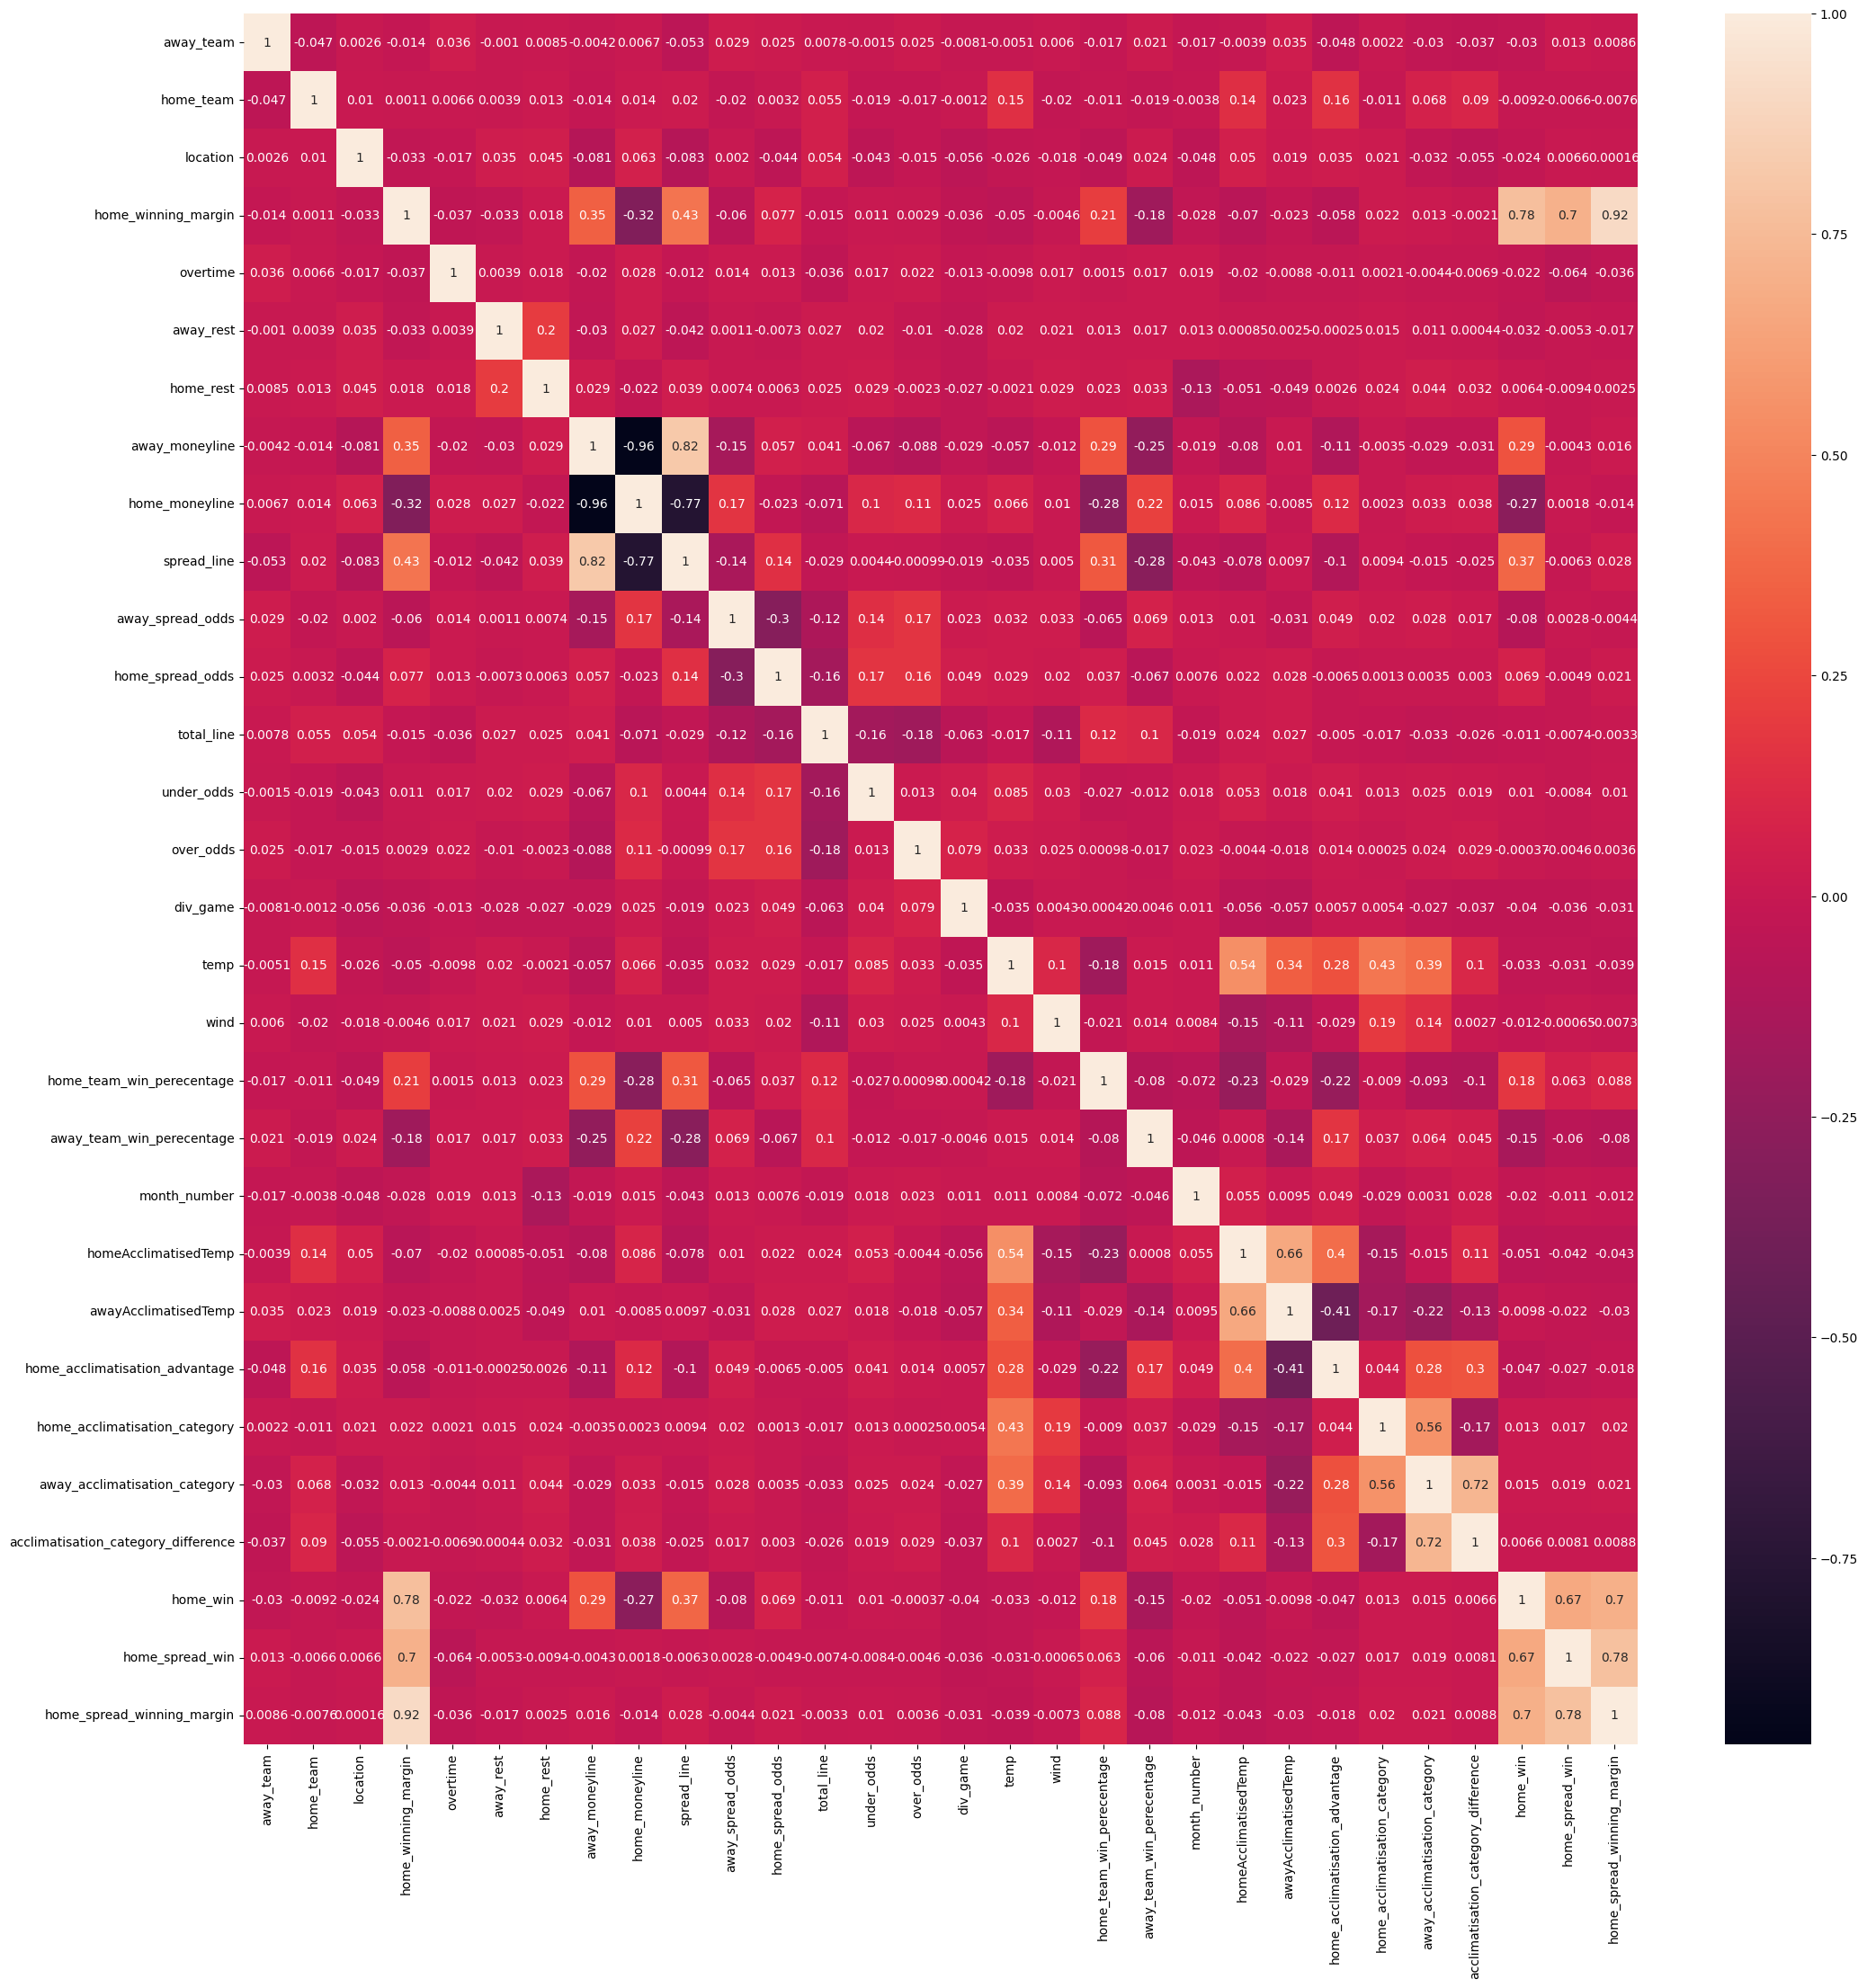

In [34]:
import seaborn as sn

corr_matrix = outdoor_with_acclimatisation_X_train.corr()

plt.figure(figsize=(25,25))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
indoor_y_train

1643    1
3522    1
1060    1
3895    1
5089    0
       ..
5462    1
1121    1
3249    0
926     1
2177    0
Name: over_totals_win, Length: 1300, dtype: int32

In [36]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
3087,28,8,0,-1.697358,-0.264164,-0.715544,-0.22435,0.254358,-0.147497,-0.063010,...,0.424244,42.35000,65.337500,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.820282
2956,25,0,0,-0.085969,-0.264164,-0.214139,-0.22435,0.627623,-0.532189,0.525449,...,-0.268965,90.20750,69.197391,0.0,0.0,0.0,0.0,0.889731,-0.961954,-0.332145
6496,15,13,0,-0.646453,-0.264164,-0.214139,-0.22435,-0.985709,0.902004,-0.987732,...,0.077639,47.52500,56.315000,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.255830
1162,25,5,0,0.544574,-0.264164,2.794295,-0.22435,-0.239180,0.341772,-0.987732,...,0.424244,39.68000,53.652500,0.0,0.0,0.0,0.0,0.889731,1.039551,1.041520
5770,21,11,0,-3.308747,-0.264164,-0.214139,-0.22435,0.246064,-0.140027,0.021055,...,0.770849,46.88000,36.987500,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-3.613677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,21,7,0,-0.366211,-0.264164,-0.214139,-0.22435,-1.645143,1.417417,-1.744323,...,0.077639,72.82087,56.255000,0.0,0.0,0.0,0.0,-1.123936,1.039551,0.392845
5693,13,5,0,-1.557238,-0.264164,3.295700,-0.22435,-1.006446,0.958027,-0.987732,...,0.424244,39.68000,42.350000,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-1.247921
3917,31,0,0,1.245178,-0.264164,-0.214139,-0.22435,0.503201,-0.401468,0.273252,...,0.770849,54.52250,34.835000,0.0,0.0,0.0,0.0,0.889731,1.039551,1.232306
607,6,5,0,-0.436271,-0.264164,-0.214139,-0.22435,-0.239180,0.341772,0.105121,...,0.077639,51.57500,57.020000,0.0,0.0,0.0,0.0,-1.123936,-0.961954,-0.522932


In [37]:
indoor_y_test

3087    0
2956    1
6496    0
1162    0
5770    0
       ..
5920    1
5693    1
3917    0
607     1
2220    1
Name: over_totals_win, Length: 325, dtype: int32

In [38]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
indoor_model = LogisticRegression(max_iter=10000)
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.49846153846153846


In [39]:
from sklearn.linear_model import LogisticRegression

outdoor_with_acclimatisation_model = LogisticRegression(max_iter=1000)
outdoor_with_acclimatisation_model.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)
print(outdoor_with_acclimatisation_model.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)) 

outdoor_with_acclimatisation_X_train

0.5329400196656834


,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,home_spread_win,home_spread_winning_margin
1012,31,27,0,1.195193,-0.252707,-0.247047,-0.256846,-0.243212,0.324929,0.034554,...,0.776823,-0.967219,-1.276692,0.422626,-0.544347,0.214774,0.705188,0.873505,1.056087,1.306361
4091,19,13,0,-1.114131,-0.252707,-0.247047,-0.256846,-1.543780,1.309071,-1.557730,...,0.038714,1.208951,1.181872,0.022256,-0.544347,-0.728413,-0.411030,-1.144813,-0.946891,-0.534053
2886,13,3,0,1.398956,-0.252707,-0.247047,-0.256846,1.016714,-0.935894,1.124012,...,-3.282777,-2.253123,-1.765217,-0.553128,-0.544347,0.214774,0.705188,0.873505,1.056087,1.043445
5893,13,31,0,0.448059,-0.252707,-0.247047,-0.256846,0.468036,-0.361519,0.369772,...,-0.330341,1.321262,0.901578,0.513534,-0.544347,-0.728413,-0.411030,0.873505,1.056087,0.329815
6419,6,14,0,0.040531,-0.252707,-0.247047,0.221890,0.240437,-0.133871,-0.049250,...,-3.282777,-1.560441,-1.713701,0.238575,-0.544347,-0.728413,-0.411030,0.873505,1.056087,0.066899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537,1,28,0,-0.638682,-0.252707,-0.247047,-0.256846,1.284956,-1.286122,1.375425,...,0.776823,-0.440216,-0.420180,-0.002635,-0.544347,-0.728413,-0.411030,-1.144813,-0.946891,-1.322801
1108,0,8,0,0.991429,-0.252707,-0.247047,-0.256846,-0.243212,0.324929,0.872599,...,0.038714,1.392135,1.773199,-0.494711,-0.544347,-0.728413,-0.411030,0.873505,1.056087,0.705410
5139,2,31,0,-1.589580,-0.252707,-0.247047,-0.256846,-0.800018,0.759212,-0.803490,...,0.038714,0.708850,0.380065,0.412003,-0.544347,-0.728413,-0.411030,-1.144813,-0.946891,-1.397920
3574,32,23,0,-0.842446,-0.252707,1.275080,-0.256846,0.167280,-0.063825,-0.216859,...,0.407769,0.038164,0.431643,-0.482122,0.802866,0.214774,-0.411030,-1.144813,-0.946891,-0.834528


In [40]:
outdoor_without_acclimatisation_model = LogisticRegression(max_iter=1000)
outdoor_without_acclimatisation_model.fit(outdoor_without_acclimatisation_X_train, outdoor_without_acclimatisation_y_train)
print(outdoor_without_acclimatisation_model.score(outdoor_without_acclimatisation_X_test, outdoor_without_acclimatisation_y_test)) 

0.5457227138643068


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, root_mean_squared_error
from tabulate import tabulate

indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_with_acclimatisation_y_pred = outdoor_with_acclimatisation_model.predict(outdoor_with_acclimatisation_X_test)
outdoor_without_acclimatisation_y_pred = outdoor_without_acclimatisation_model.predict(outdoor_without_acclimatisation_X_test)


In [42]:
print(tabulate(
    [
        ['Accuracy score', 
         round(accuracy_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(accuracy_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1), 
         round(accuracy_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

        ['F1 score', 
         round(f1_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(f1_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1), 
         round(f1_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

        ['Precision score', 
         round(precision_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(precision_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
         round(precision_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1), ],

         ['Recall Score',
          round(recall_score(indoor_y_test, indoor_y_pred)*100, 1), 
          round(recall_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
          round(recall_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

          ['Mean Squared Error',
           round(mean_squared_error(indoor_y_test, indoor_y_pred)*100, 1), 
           round(mean_squared_error(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
           round(mean_squared_error(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],
           
         
         ['Root Mean Squared Error',
           round(root_mean_squared_error(indoor_y_test, indoor_y_pred)*100, 1), 
           round(root_mean_squared_error(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
           round(root_mean_squared_error(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)]

         ], headers=['  ', 'Indoor', 'Outdoor with acclimatisation', 'Outdoor without acclimatisation'], tablefmt='grid'
))

+-------------------------+----------+--------------------------------+-----------------------------------+
|                         |   Indoor |   Outdoor with acclimatisation |   Outdoor without acclimatisation |
+=========================+==========+================================+===================================+
| Accuracy score          |     49.8 |                           53.3 |                              54.6 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| F1 score                |     48.9 |                           41.3 |                              37.6 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| Precision score         |     56.9 |                           50.8 |                              60.7 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| Recall Score            | 

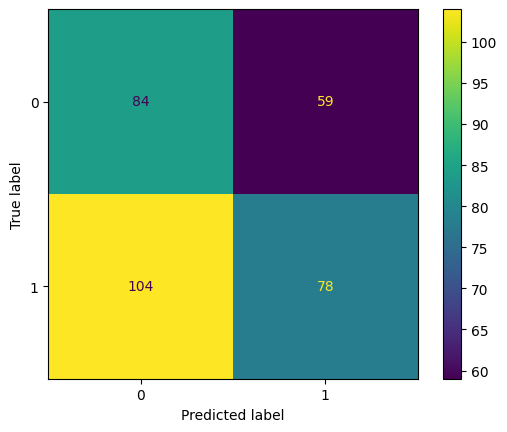

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(indoor_y_test, indoor_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

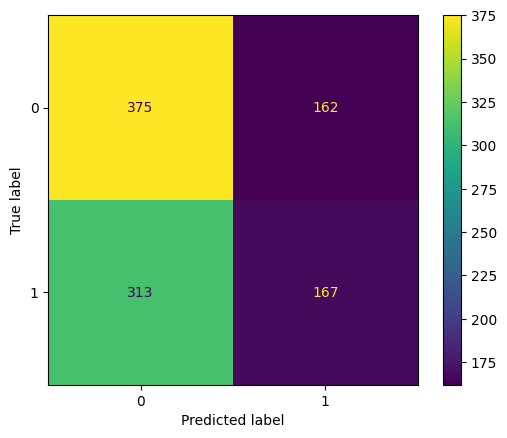

In [44]:
confusion_matrix = metrics.confusion_matrix(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

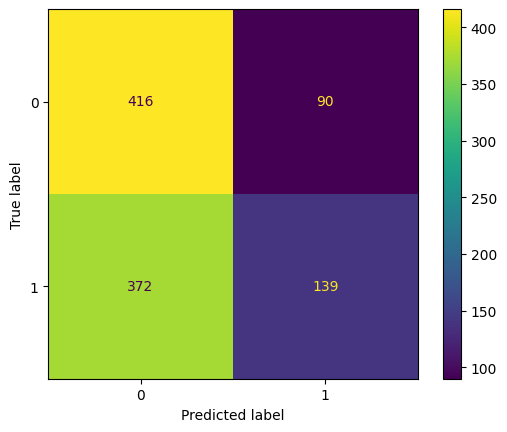

In [45]:
confusion_matrix = metrics.confusion_matrix(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

In [62]:
import random
for i in range(10):

    new_game = [[
        random.randint(1,32),#away_team
        random.randint(1,32),#home_team
        0,#location
        outdoor_df['home_winning_margin'].median(),#home_winning_margin
        0,#overtime
        7,#away_rest
        7,#home_rest
        outdoor_df['away_moneyline'].median(),#away_moneyline
        outdoor_df['home_moneyline'].median(),#home_moneyline
        outdoor_df['spread_line'].median(),#spread_line
        outdoor_df['away_spread_odds'].median(),#away_spread_odds
        outdoor_df['home_spread_odds'].median(),#home_spread_odds
        33,#total_line
        outdoor_df['under_odds'].median(),#under_odds
        outdoor_df['over_odds'].median(),#over_odds
        outdoor_df['temp'].median(),#temp
        outdoor_df['wind'].median(),#wind
        random.randint(0,1),#div_game
        random.randint(0,1),#home_win
        1,#home_spread_win
        4,#home_spread_winning_margin
        0.5,#home_team_win_perecentage
        0.5,#away_team_win_perecentage
        random.randrange(9,12),#month_number
        outdoor_df['homeAcclimatisedTemp'].median(),#homeAcclimatisedTemp
        outdoor_df['awayAcclimatisedTemp'].median(),#awayAcclimatisedTemp
        outdoor_df['home_acclimatisation_advantage'].median(),#home_acclimatisation_advantage
        1,#home_acclimatisation_category
        3,#away_acclimatisation_category
        outdoor_df['acclimatisation_category_difference'].median()#acclimatisation_category_difference
    ]]

    new_game_with_scaling = scaler.transform(new_game)
    prediction = outdoor_with_acclimatisation_model.predict(new_game_with_scaling)

    if prediction ==1:
        print("Over")
    else:
        print("Under")

Over
Under
Under
Over
Over
Under
Under
Under
Under
Over
[[21, 29, 0, 0.04053086453183652, 0, 7, 7, -0.24321180185440555, 0.3249287884642962, 0.11835870745225174, -0.7791980974307714, -0.7853513256531737, 33, -0.7404856543197391, -0.7037624294553044, 0.13988420319245645, -0.019598881603102643, 1, 1, 1, 4, 0.5, 0.5, 9, 0.038164495206512314, 0.030478490509592282, 0.02225591495109759, 1, 3, -0.4110302817133311]]


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning:

In [47]:
from sklearn.naive_bayes import GaussianNB

gaussianModel = GaussianNB()
gaussianModel.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)
print(gaussianModel.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5585054080629301


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)

print(knn.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5132743362831859


In [49]:
from sklearn import svm

vector_clf = svm.SVC(kernel='linear') 

vector_clf.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)

print(vector_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5417895771878073


In [50]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)

print(tree_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test))

0.5221238938053098


In [51]:
print(tabulate(
    [
        ['Logistic regression', 
         round(outdoor_with_acclimatisation_model.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)],

        ['Gaussian', 
         round(gaussianModel.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)],

         ['K Nearest Neighbours',
          round(knn.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)],

          ['Support Vector Machine',
           round(vector_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)], 

        ['Decision tree',
           round(tree_clf.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)*100, 1)], 

         ], headers=['Model', 'Score'], tablefmt='grid'
))

+------------------------+---------+
| Model                  |   Score |
+========================+=========+
| Logistic regression    |    53.3 |
+------------------------+---------+
| Gaussian               |    55.9 |
+------------------------+---------+
| K Nearest Neighbours   |    51.3 |
+------------------------+---------+
| Support Vector Machine |    54.2 |
+------------------------+---------+
| Decision tree          |    52.2 |
+------------------------+---------+
